In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
matplotlib.rcParams['text.usetex'] = True

In [2]:
def ackley(x):
    a = 20
    b = 0.2
    c = 1
    return -(
        -a * np.exp(-b * np.sqrt(np.sum(x**2) / len(x)))
        - np.exp(np.sum(np.cos(c * x)) / len(x))
        + a
        + np.e
    )

In [3]:
def f_tilde(f, mn_f, mx_f, x, c, eps):
  dist_x_c = np.linalg.norm(x - c)
  if dist_x_c < eps/2:
    return f(x) + 2 * (1 - dist_x_c / (eps / 2)) * (mx_f - mn_f + 1)
  else:
    return f(x)

In [4]:
cmap_ackley = LinearSegmentedColormap.from_list("blue", ["#28448F", "#dfe5f6"])
cmap_ackley_tilde = LinearSegmentedColormap.from_list("yellow", ["#8F7328", "#F6F0DF"])

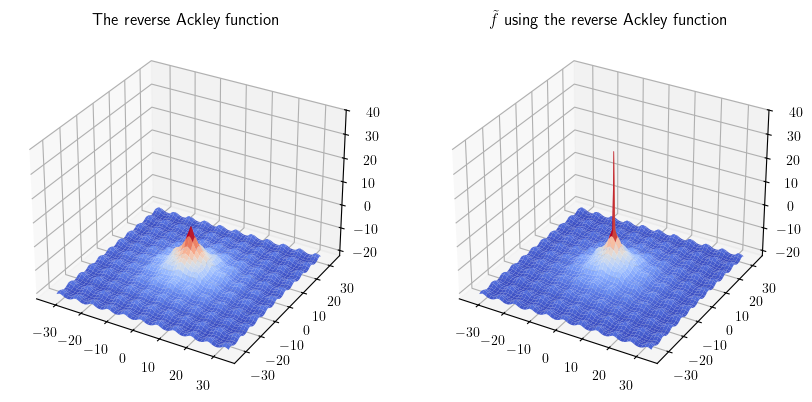

In [5]:
# two side-by-side 3D plots
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

bounds = np.array([[-32.768, 32.768], [-32.768, 32.768]])

x = np.linspace(bounds[0, 0], bounds[0, 1], 300)
y = np.linspace(bounds[1, 0], bounds[1, 1], 300)
X, Y = np.meshgrid(x, y)
Z_ackley = np.array([ackley(np.array([x, y])) for x, y in zip(X.flatten(), Y.flatten())])
Z_ackley = Z_ackley.reshape(X.shape)

# 3D surface plot
ax1.plot_surface(X, Y, Z_ackley, cmap="coolwarm", edgecolor='none')
mx_ackley = Z_ackley.flatten().max()
mn_ackley = Z_ackley.flatten().min()
ax1.set_zlim(mn_ackley, 40)
ax1.set_title("The reverse Ackley function")

c = np.array([0, 0])
eps = 1
ackley_tilde = lambda x: f_tilde(ackley, mn_ackley, mx_ackley, x, c, eps)
Z_tilde = np.array([ackley_tilde(np.array([x, y])) for x, y in zip(X.flatten(), Y.flatten())])
Z_tilde = Z_tilde.reshape(X.shape)

# 3D surface plot for ackley_tilde
ax2.plot_surface(X, Y, Z_tilde, cmap="coolwarm", edgecolor='none')
ax2.set_zlim(mn_ackley, 40)
ax2.set_title("$\\tilde{f}$ using the reverse Ackley function")

plt.savefig("../../../static_files/ackley_tilde.png", bbox_inches="tight", dpi=85)